In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
from hermes3.front_tracking import *
# from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


# I/O

In [2]:
fcx_on_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_on/corrected_fcx_on_high_density_4.8e18_start_floor_correction_pulse')
fcx_off_ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_off/corrected_fcx_off_high_density_4.8e18_floor_correction_start_pulse')


fcx_on_ds = fcx_on_ds.hermes.extract_1d_tokamak_geometry()
fcx_off_ds = fcx_off_ds.hermes.extract_1d_tokamak_geometry()





In [3]:
print(fcx_on_ds.isel(t=-1)['dx'])

<xarray.DataArray 'dx' (pos: 400)>
dask.array<getitem, shape=(400,), dtype=float64, chunksize=(400,), chunktype=numpy.ndarray>
Coordinates:
    dx       (pos) float64 dask.array<chunksize=(400,), meta=np.ndarray>
    dy       (pos) float64 dask.array<chunksize=(400,), meta=np.ndarray>
    dz       (pos) float64 dask.array<chunksize=(400,), meta=np.ndarray>
    t        float64 1.671
    x        int64 0
    y        (pos) float64 0.05019 0.1504 0.2505 0.3502 ... 21.14 21.15 21.15
    z        float64 3.142
  * pos      (pos) float64 -0.1503 -0.05001 0.05001 0.1498 ... 20.94 20.95 20.95
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       
    units_type:     SI
    units:          Wb
    conversion:     1.0439684754508788e-06
  

In [4]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms", use_squash = True, verbose = True)


case_2d_fcx_off = case.ds.hermes.extract_2d_tokamak_geometry()


case_2d_fcx_off.hermesm.get_front_position(more_fronts = False)


db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7f-BASELINE1_2x_tanh_25ms', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m7f-BASELINE1_2x_tanh_25ms", use_squash = True, verbose = True)

case_2d_fcx_on = case.ds.hermes.extract_2d_tokamak_geometry()

case_2d_fcx_on.hermesm.get_front_position(more_fronts = False)





- Reading case m8bb-BASELINE1C_noFcx_7pcC_tanh_25ms
-----------------------
- Looking for squash file
- Squash file found. squash date 03/04/2025, 17:03:43, dmp file date 03/04/2025, 17:02:01

Unnormalising with xHermes
- Reading case m7f-BASELINE1_2x_tanh_25ms
-----------------------
- Looking for squash file
- Squash file found. squash date 03/04/2025, 21:10:54, dmp file date 03/04/2025, 21:05:49

Unnormalising with xHermes


In [5]:
for i in case_2d_fcx_off.data_vars:
    print(case_2d_fcx_off[i])

<xarray.DataArray 'Bxy' (x: 40, theta: 108)>
dask.array<open_dataset-96082bb262196d1da4665399e0c77179Bxy, shape=(40, 108), dtype=float64, chunksize=(40, 108), chunktype=numpy.ndarray>
Coordinates: (12/23)
  * x                        (x) int64 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * theta                    (theta) float64 0.07854 0.2356 ... 16.73 16.89
    dx                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    ...                       ...
    Zxy_lower_left_corners   (x, theta) float64 -1.295 -1.287 ... -1.719 -1.723
    Zxy_lower_right_corners  (x, theta) float64 -1.294 -1.286 ... -1.692 -1.696
    Zxy_upper_left_corners   (x, theta) float64 -1.287 -1

In [6]:
params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle',
          'front_poldist_5eV','Rd+_iz']
          


profile_fcx_off = get_1d_poloidal_data(case_2d_fcx_off.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_fcx_off_plus1 = get_1d_poloidal_data(case_2d_fcx_off.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 7)

profile_fcx_on = get_1d_poloidal_data(case_2d_fcx_on.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_fcx_on_plus1 = get_1d_poloidal_data(case_2d_fcx_on.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 7)

6 None
Parameter Rd+_iz not found
7 None
Parameter Rd+_iz not found
6 None
Parameter Rd+_iz not found
7 None
Parameter Rd+_iz not found


## geometry

# Steady State parallel heat flux

Done

## Base comparison

## Tuned comparison

# Steady state profiles

# Impact of cross field transport (energy loss plot)

In [7]:
def plot_plasma_loss_terms(profile, profile_plus1, plasma_loss_terms=None, linewidth=2):
    """
    Plots various plasma loss terms based on the given profiles.

    Parameters:
    - profile: DataFrame or similar object containing plasma profile data.
    - profile_plus1: DataFrame or similar object containing the next timestep's plasma profile data.
    - plasma_loss_terms: List of strings specifying the plasma loss terms to plot. Default is None, which uses a predefined list.
    - linewidth: Linewidth for the plot lines (default is 2).
    """
    if plasma_loss_terms is None:
        plasma_loss_terms = ['Ed+_ex', 'Rc', 'Rd+_ex']
    
    iz_rec = ['Ed+_rec', 'Ed+_iz', 'Rd+_rec']

    iz_rec_tot = profile['Ed+_rec'] + profile['Ed+_iz'] + profile['Rd+_rec']

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Calculate various loss terms
    cross_field_loss_neut_adv = (((profile['efd_adv_perp_ylow'] + profile['efd_adv_perp_xlow']) - 
                                  (profile_plus1['efd_adv_perp_ylow'] + profile_plus1['efd_adv_perp_xlow'])) / profile['dv'])

    cross_field_loss_neut_cond = (((profile['efd_cond_perp_ylow'] + profile['efd_cond_perp_xlow']) -
                                   (profile_plus1['efd_cond_perp_ylow'] + profile_plus1['efd_cond_perp_xlow'])) / profile['dv'])

    cross_field_loss_neut_total = cross_field_loss_neut_adv + cross_field_loss_neut_cond

    cross_field_loss_e = (profile['efe_tot_xlow'] - profile_plus1['efe_tot_xlow']) / profile['dv']
    cross_field_loss_i = (profile['efd+_tot_xlow'] - profile_plus1['efd+_tot_xlow']) / profile['dv']

    # X-point location (max of R)
    xpoint_loc = profile['Spar'][np.argmin(profile['R'])]

    # Plot the plasma loss terms
    # for term in plasma_loss_terms:
    #     if term in profile:
    #         ax.plot(profile['Spar'], profile[term], label=term, linewidth=linewidth)
    
    cross_field_total = cross_field_loss_e + cross_field_loss_i
    # Plot the additional calculated loss terms
    # ax.plot(profile['Spar'], cross_field_loss_e, label='efe_tot_xlow/dv', linewidth=linewidth, color='b')
    # ax.plot(profile['Spar'], cross_field_loss_i, label='efd+_tot_xlow/dv', linewidth=linewidth, color='r')
    ax.plot(profile['Spar'], cross_field_total, label='Cross field plasma', linewidth=linewidth, color = 'red')
    ax.plot(profile['Spar'], cross_field_loss_neut_total, label='Cross field neutrals', linewidth=linewidth, color = 'darkred')
    ax.plot(profile['Spar'], -1*profile['Edd+_cx'], label='CX', linewidth=linewidth, color = 'teal', linestyle=':')
    ax.plot(profile['Spar'], iz_rec_tot, label='IZ/REC', linewidth=linewidth, color = 'blue', linestyle=':')
    ax.plot(profile['Spar'], profile['Rd+_ex'], label='Hydrogenic radiation', linewidth=linewidth, color = 'black', linestyle= '--')
    ax.plot(profile['Spar'], profile['Rc'], label='Impurity radiation', linewidth=linewidth, color = 'grey', linestyle='--')


    # Mark the X-point location
    ax.axvline(xpoint_loc, color='black', linestyle='--')

    # Set the axis labels and legend
    ax.set_xlabel('Spar (m)')
    ax.set_ybound(-3e6, 1e6)
    ax.set_ylabel('Energy Loss (W/m$^3$)')
    ax.legend()

    # Show the plot
    plt.show()


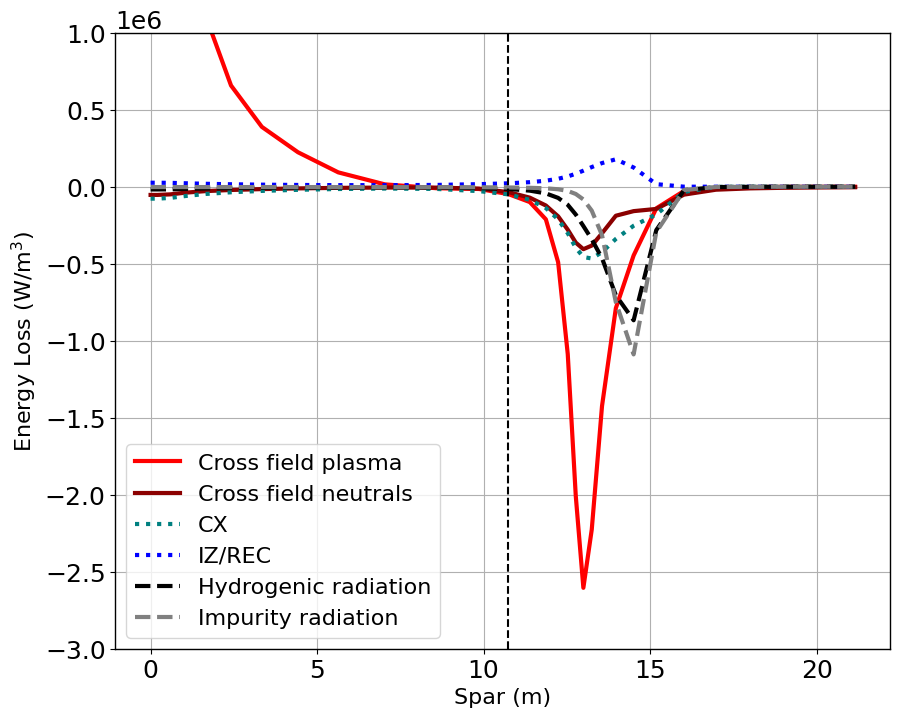

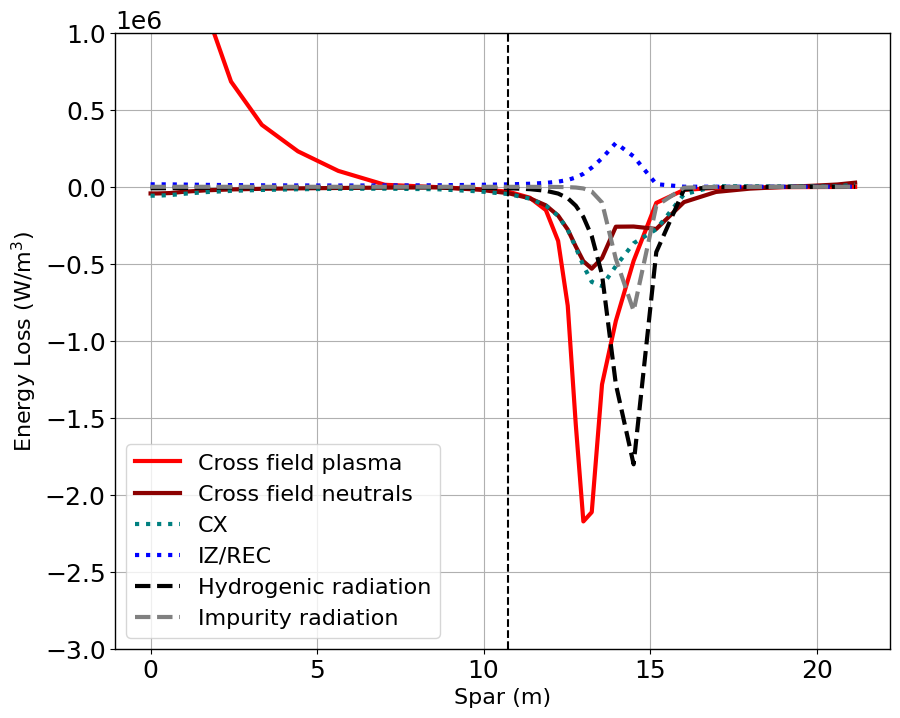

In [8]:

plot_plasma_loss_terms(profile_fcx_off, profile_fcx_off_plus1, linewidth=linewidth)
plot_plasma_loss_terms(profile_fcx_on, profile_fcx_on_plus1, linewidth=linewidth)

#  Detachment response to TanH pulses 

# Time history of cross field transport

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_power_terms_against_time(case_2d_geom, case_1d, params, linewidth=1, markersize=3, sol_ring = 6):
    """
    Plots power terms against time for the given dataset.

    Parameters:
    - case_2d_geom: The dataset (xarray or similar) containing the 2D plasma geometry and time steps.
    - params: List of parameters to extract from the dataset.
    - linewidth: Linewidth for the plot lines (default is 2).
    - markersize: Size of the plot markers (default is 6).
    """
    # Lists to store results
    power_in = []
    power_out_H = []
    power_out_c = []
    power_out_radial = []

    t_norm = (case_2d_geom['t'] - case_2d_geom['t'][0]) * 1e3



    for value, t in enumerate(case_2d_geom['t']):
        profile = get_1d_poloidal_data(case_2d_geom.isel(t=value), params=params, region='outer_lower', sepadd=sol_ring)  # Use t for time
        profile_plus1 = get_1d_poloidal_data(case_2d_geom.isel(t=value), params=params, region='outer_lower', sepadd=sol_ring + 1)  # Next time step
        xpoint_ind = np.argmin(profile['R'])

        # Parallel power at time t
        power_in.append((profile['efe_tot_ylow'][xpoint_ind] + profile['efd+_tot_ylow'][xpoint_ind]) * 1e-6)

        # Power loss terms
        power_out_H.append(np.sum(profile['Rd+_ex'] * profile['dv']) * -1e-6)
        power_out_c.append(np.sum(profile['Rc'] * profile['dv']) * -1e-6)

        # Radial power difference
        power_out = (profile['efe_tot_xlow'][xpoint_ind:-2] + profile['efd+_tot_xlow'][xpoint_ind:-2])
        power_out_plus1 = (profile_plus1['efe_tot_xlow'][xpoint_ind:-2] + profile_plus1['efd+_tot_xlow'][xpoint_ind:-2])
        power_out_radial.append(np.sum((power_out - power_out_plus1) * -1e-6))

    profile_dx = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params=params, region='outer_lower', sepadd=sol_ring)
    dx_scale = profile_dx['dx'].values[0]
    power_in_1D = []
    power_out_H_1D = []
    power_out_c_1D = []
    power_out_radial_1D = []
    t_norm_1D = (case_1d['t'] - case_1d['t'][0]) * 1e3
    xpoint_ind_1D = np.argmin(abs(case_1d['y'].values - case_1d.options['mesh']['length_xpt']))
    for value, t in enumerate(case_1d['t']):
        profile = get_1d_poloidal_data(case_2d_geom.isel(t=value), params=params, region='outer_lower', sepadd=sol_ring)
        dx = profile['dx'].values
        case = case_1d.isel(t=value)
        power_in_1D.append(((case['efe_tot_ylow'][xpoint_ind_1D] + case['efd+_tot_ylow'][xpoint_ind_1D])* dx_scale) * 1e-6 )
        power_out_H_1D.append(np.sum((case['Rd+_ex'] * case['dv'])*dx_scale) * -1e-6)
        power_out_c_1D.append(np.sum((case['Rcarbon'] * case['dv'])* dx_scale) * -1e-6)

    

    # Plotting results
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    # ax2 = ax.twinx()
    ax.plot(t_norm, power_in, label=r'P$_\text{in,xpoint}$ 2D', linewidth=linewidth, linestyle = '--', color = 'blue')
    ax.plot(t_norm, power_out_H, label=r'P$_\text{out,d}$ 2D' , linewidth=linewidth, linestyle = '--', color = 'orange')
    ax.plot(t_norm, power_out_c, label=r'P$_\text{out,c}$ 2D', linewidth=linewidth, linestyle = '--', color =  'green')
    ax.plot(t_norm, power_out_radial, label=r'P$_\text{out,radial}$ 2D', linewidth=linewidth, linestyle = '--', color = 'red')

    ax.plot(t_norm_1D, power_in_1D, label=r'P$_\text{in,xpoint}$ 1D', linewidth=linewidth, color = 'blue')
    ax.plot(t_norm_1D, power_out_H_1D, label=r'P$_\text{out,d}$ 1D', linewidth=linewidth, color = 'orange')
    ax.plot(t_norm_1D, power_out_c_1D, label=r'P$_\text{out,c}$ 1D', linewidth=linewidth, color = 'green')


    ax.set_xbound(0, np.max(t_norm))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Power 1D (MW)')
    # ax2.set_ylabel('Power 2D (MW)')
    ax.legend()

    plt.show()


In [10]:
case = profile_fcx_off['dx']
print(case)
# print((case['Rd+_ex'] * case['dv'])* -1e-6) 

0     0.00016
1     0.00016
2     0.00016
3     0.00016
4     0.00016
5     0.00016
6     0.00016
7     0.00016
8     0.00016
9     0.00016
10    0.00016
11    0.00016
12    0.00016
13    0.00016
14    0.00016
15    0.00016
16    0.00016
17    0.00016
18    0.00016
19    0.00016
20    0.00016
21    0.00016
22    0.00016
23    0.00016
24    0.00016
25    0.00016
26    0.00016
27    0.00016
28    0.00016
29    0.00016
30    0.00016
Name: dx, dtype: float64


In [11]:
params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle',
          'front_poldist_5eV']
          
plot_power_terms_against_time(case_2d_fcx_off, fcx_off_ds, params, linewidth=linewidth, markersize=markersize)
plot_power_terms_against_time(case_2d_fcx_on, fcx_on_ds, params, linewidth=linewidth, markersize=markersize)


6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None
7 None
6 None

IndexError: index 99 is out of bounds for axis 0 with size 99

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_power_terms_against_time(case_2d_geom, case_1d, params, linewidth=1, markersize=3, sol_ring=6):
    """
    Plots power terms against time for the given dataset.

    Parameters:
    - case_2d_geom: The dataset (xarray or similar) containing the 2D plasma geometry and time steps.
    - case_1d: The 1D dataset (xarray or similar) containing the 1D power terms.
    - params: List of parameters to extract from the dataset.
    - linewidth: Linewidth for the plot lines (default is 2).
    - markersize: Size of the plot markers (default is 6).
    """
    # Normalize the time arrays
    t_norm_2D = (case_2d_geom['t'] - case_2d_geom['t'][0]) * 1e3
    t_norm_1D = (case_1d['t'] - case_1d['t'][0]) * 1e3

    # 2D power terms calculation
    profile_data = get_1d_poloidal_data(case_2d_geom, params=params, region='outer_lower', sepadd=sol_ring)
    profile_plus1_data = get_1d_poloidal_data(case_2d_geom, params=params, region='outer_lower', sepadd=sol_ring + 1)
    
    # Find xpoint index across all time steps
    xpoint_indices_2D = np.argmin(profile_data['R'], axis=1)

    # Power terms for 2D data
    power_in_2D = (profile_data['efe_tot_ylow'] + profile_data['efd+_tot_ylow']) * 1e-6
    power_in_2D = power_in_2D[:, xpoint_indices_2D]  # Using xpoint indices for selection

    power_out_H_2D = np.sum(profile_data['Rd+_ex'] * profile_data['dv'], axis=1) * -1e-6
    power_out_c_2D = np.sum(profile_data['Rc'] * profile_data['dv'], axis=1) * -1e-6

    # Radial power difference for 2D data
    power_out_2D = (profile_data['efe_tot_xlow'] + profile_data['efd+_tot_xlow']).isel(t=slice(None))
    power_out_plus1_2D = (profile_plus1_data['efe_tot_xlow'] + profile_plus1_data['efd+_tot_xlow']).isel(t=slice(None))
    power_out_radial_2D = np.sum((power_out_2D - power_out_plus1_2D) * -1e-6, axis=1)

    # 1D power terms calculation
    xpoint_ind_1D = case_1d.options['mesh']['length_xpt']
    
    power_in_1D = (case_1d['efe_tot_ylow'] + case_1d['efd+_tot_ylow']) * 1e-6
    power_in_1D = power_in_1D[:, xpoint_ind_1D]

    power_out_H_1D = np.sum(case_1d['Rd+_ex'] * case_1d['dv'], axis=1) * -1e-6
    power_out_c_1D = np.sum(case_1d['Rc'] * case_1d['dv'], axis=1) * -1e-6

    # Plotting results
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.plot(t_norm_2D, power_in_2D, label=r'P$_\text{in,xpoint}$ 2D', linewidth=linewidth, linestyle='--', color='blue')
    ax.plot(t_norm_2D, power_out_H_2D, label=r'P$_\text{out,d}$ 2D', linewidth=linewidth, linestyle='--', color='orange')
    ax.plot(t_norm_2D, power_out_c_2D, label=r'P$_\text{out,c}$ 2D', linewidth=linewidth, linestyle='--', color='green')
    ax.plot(t_norm_2D, power_out_radial_2D, label=r'P$_\text{out,radial}$ 2D', linewidth=linewidth, linestyle='--', color='red')

    ax.plot(t_norm_1D, power_in_1D, label=r'P$_\text{in,xpoint}$ 1D', linewidth=linewidth, color='blue')
    ax.plot(t_norm_1D, power_out_H_1D, label=r'P$_\text{out,d}$ 1D', linewidth=linewidth, color='orange')
    ax.plot(t_norm_1D, power_out_c_1D, label=r'P$_\text{out,c}$ 1D', linewidth=linewidth, color='green')

    ax.set_xbound(0, np.max(t_norm_2D))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Power (MW)')
    ax.legend()

    plt.show()

    



## sol ring plot, but vs time for power flux through x point, and loss terms

## Time history of profiles during rise period, flat top and fall of pulse

6 None


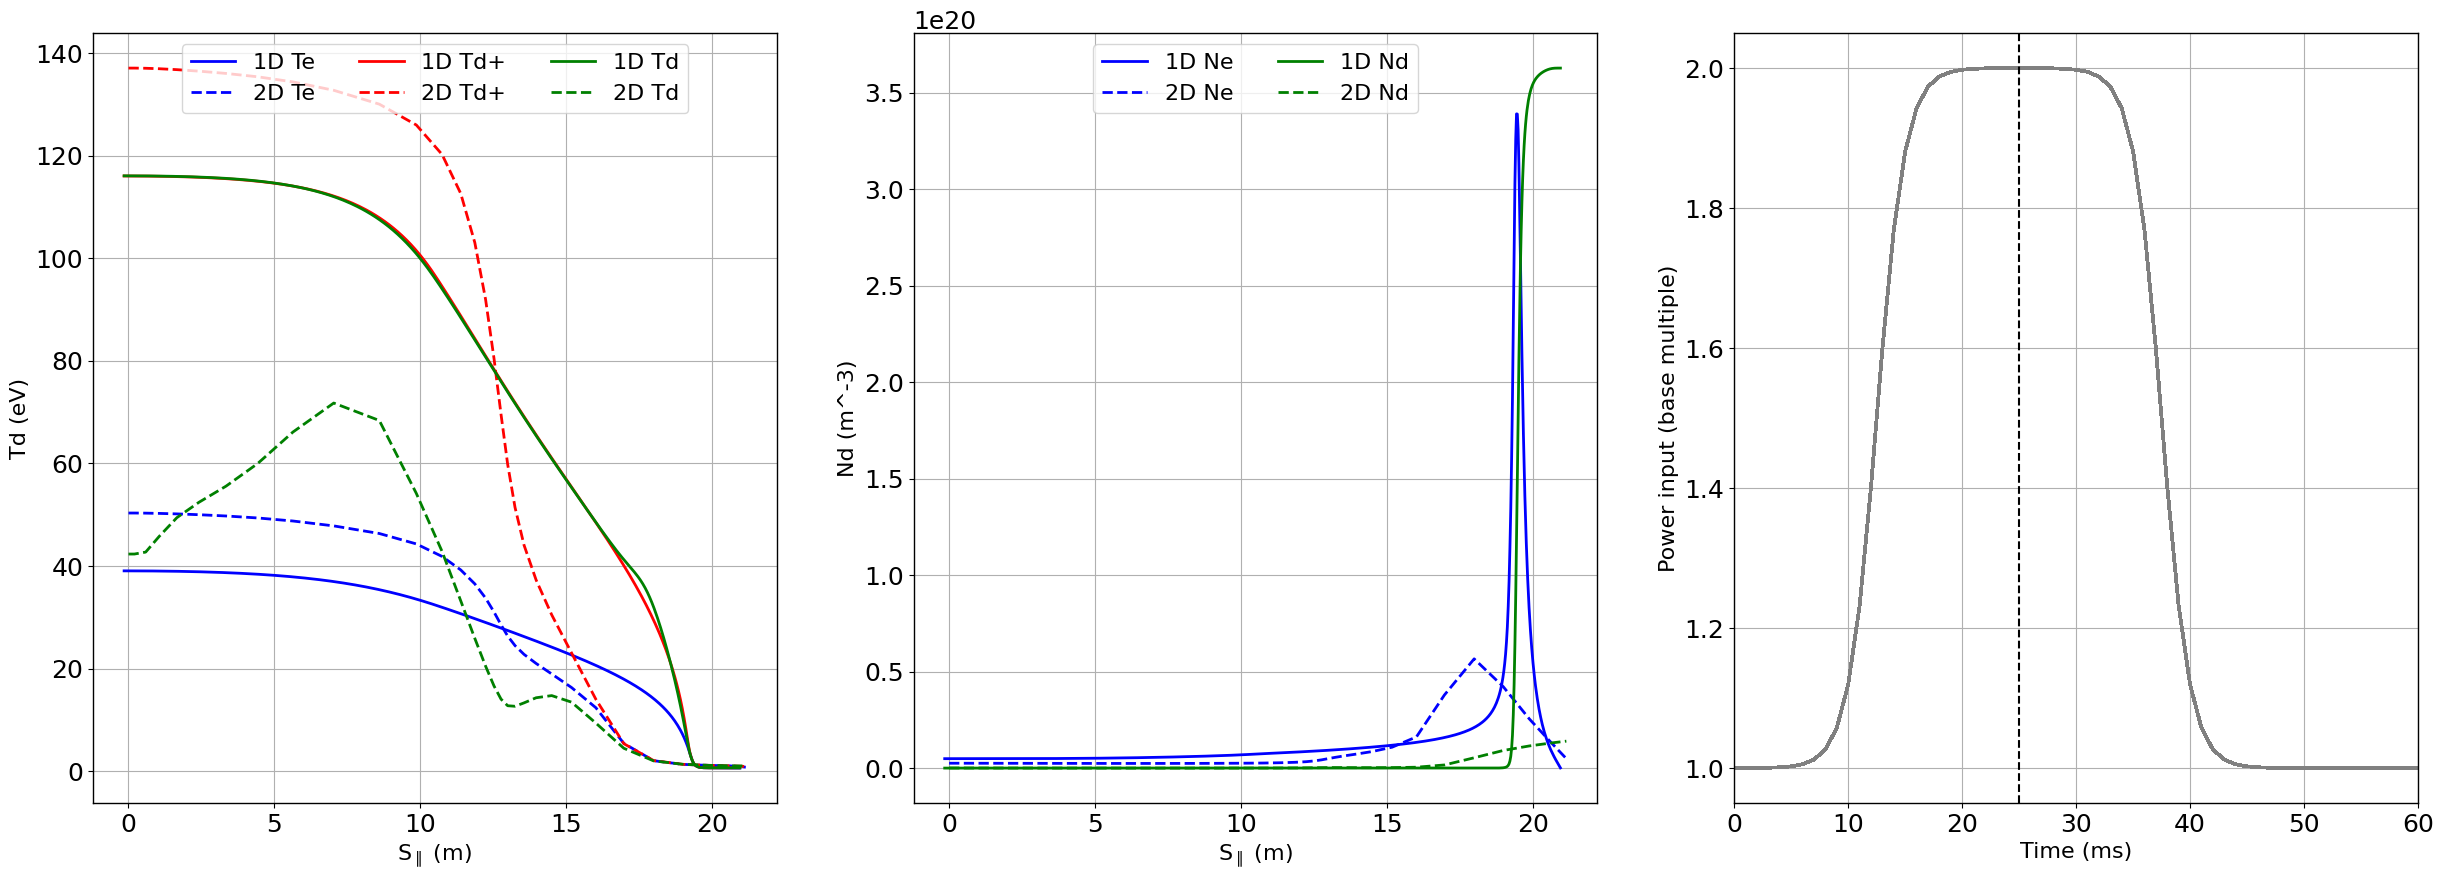

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle',
          'front_poldist_5eV', 'Te', 'Td+', 'Td', 'Ne', 'Nd']

plot_params = [['Te', 'Td+', 'Td'], ['Ne', 'Nd']]
colors = ['b', 'r', 'g']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax = ax.flatten()

pow_multiple = 1.5

time = 12

time_1D = (fcx_on_ds['t'].values - fcx_off_ds['t'].values[0]) * 1e3
time_2D = (case_2d_fcx_on['t'].values - case_2d_fcx_on['t'].values[0]) * 1e3

time_index_1D = np.argmin(abs(time_1D - time))
time_index_2D = np.argmin(abs(time_2D - time))

index = 25

# Get 2D and 1D data for the specific time index
profile = get_1d_poloidal_data(case_2d_fcx_off.isel(t=index), params=params, region='outer_lower', sepadd=6)
case = fcx_off_ds.isel(t=index)

for i, params in enumerate(plot_params):
    if i == 1:
        colors = ['b', 'g']
    else:
        colors = ['b', 'r', 'g']
    
    for j, param in enumerate(params):
        # First plot the 1D data with the label "1D {param}"
        ax[i].plot(case['pos'], case[param], label=f'1D {param}', linewidth=2, color=colors[j])
        # Then plot the 2D data with the label "2D {param}"
        ax[i].plot(profile['Spar'], profile[param], label=f'2D {param}', linewidth=2, linestyle='--', color=colors[j])
    
    # Set the legend, position, and labels
    if i == 0:
        ax[i].legend(ncols=3, loc='upper center')
    else:
        ax[i].legend(ncols=2, loc='upper center')
    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel(f'{param} ({case[param].units})')

# Power plot
pow_time = ((fcx_on_ds['t'] - fcx_on_ds['t'][0]) * 1e3)[index]
ax[2].plot((fcx_on_ds['t'] - fcx_on_ds['t'][0]) * 1e3, fcx_on_ds['Pe_src'] / fcx_on_ds['Pe_src'][-1], label='Pressure source', linewidth=2, color='grey', alpha=0.5)
ax[2].axvline(pow_time, color='black', linestyle='--')
ax[2].set_xbound(0, 60)
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Power input (base multiple)')

plt.show()


6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None
6 None


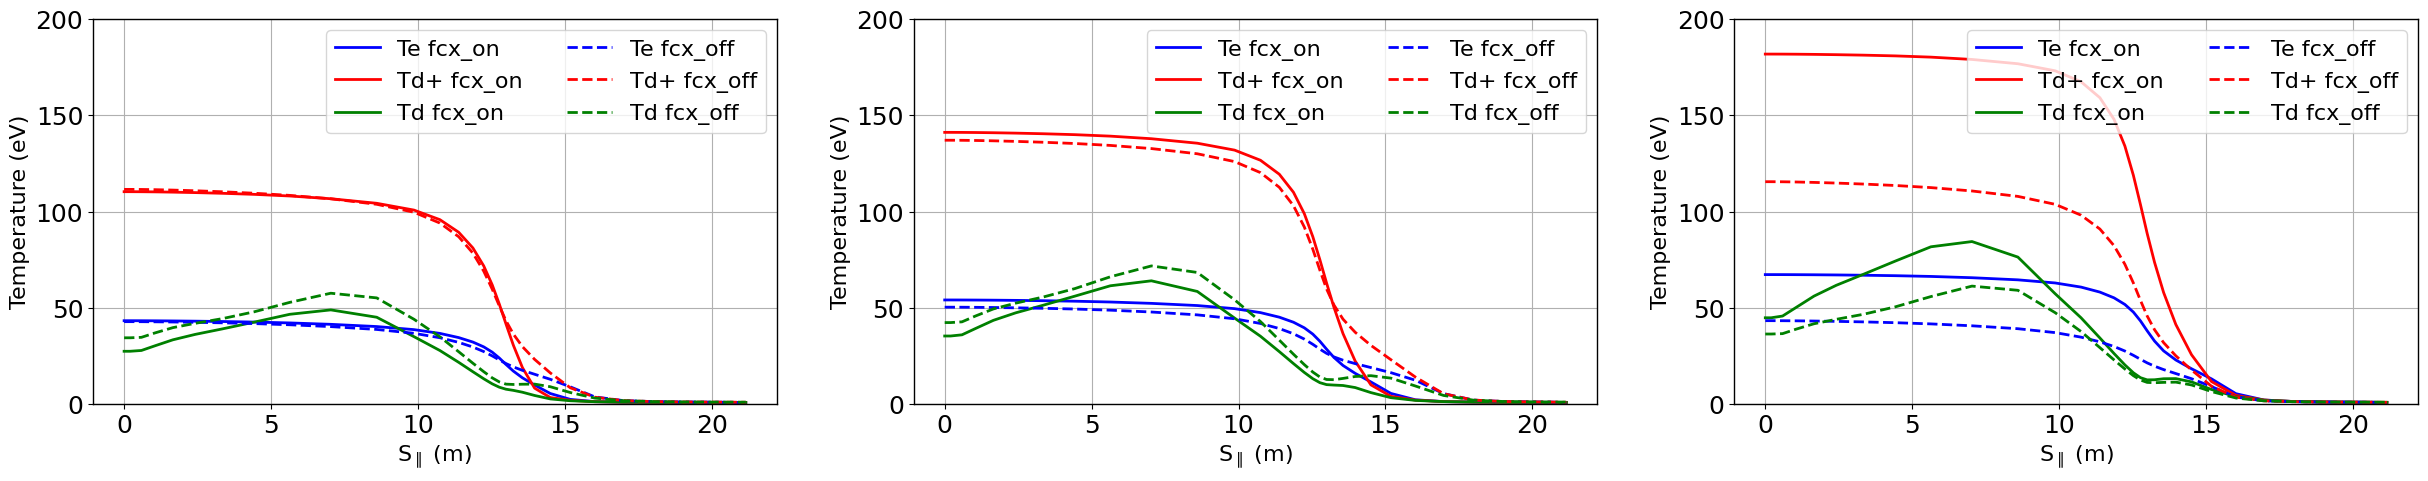

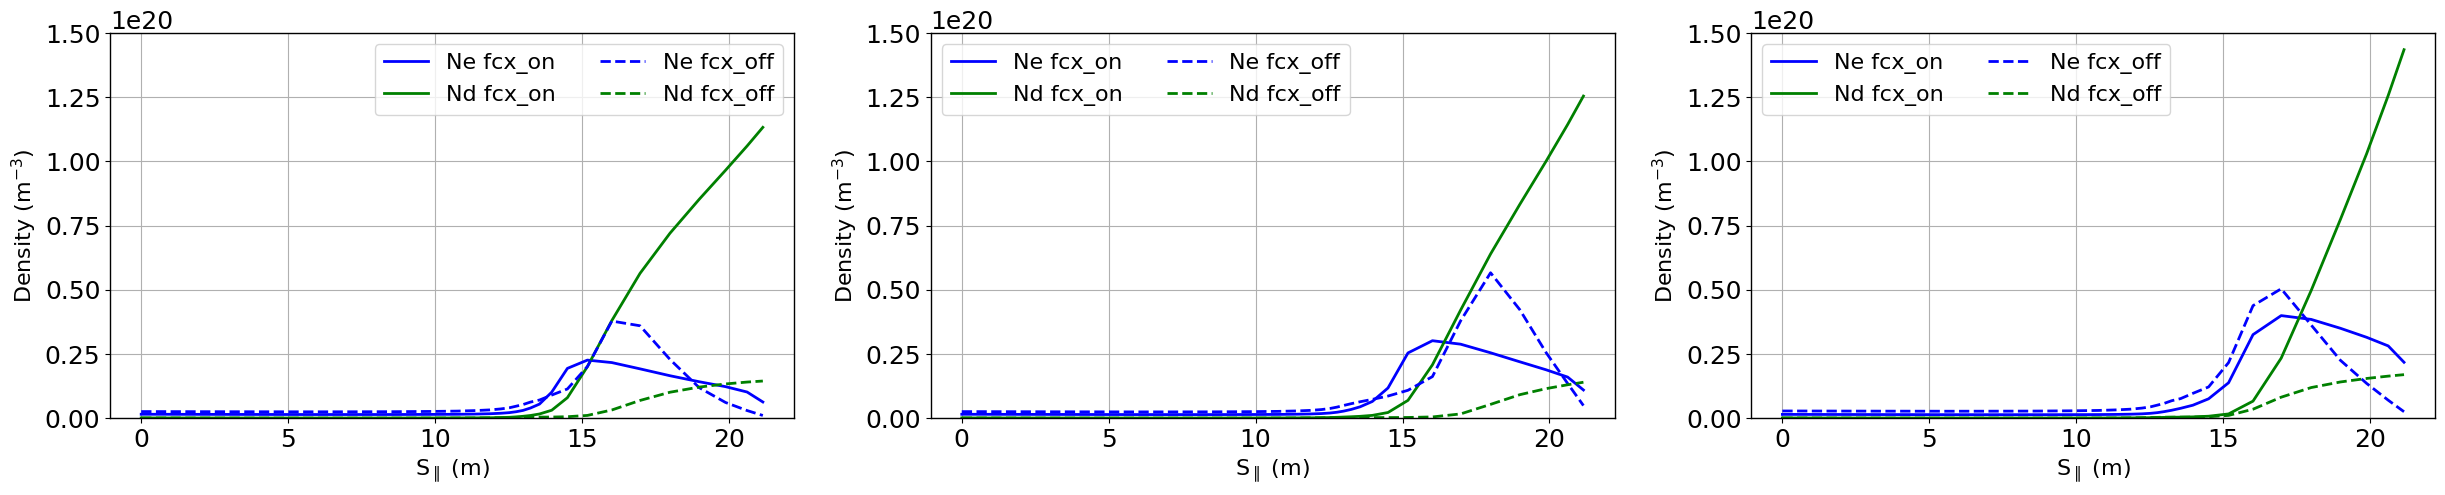

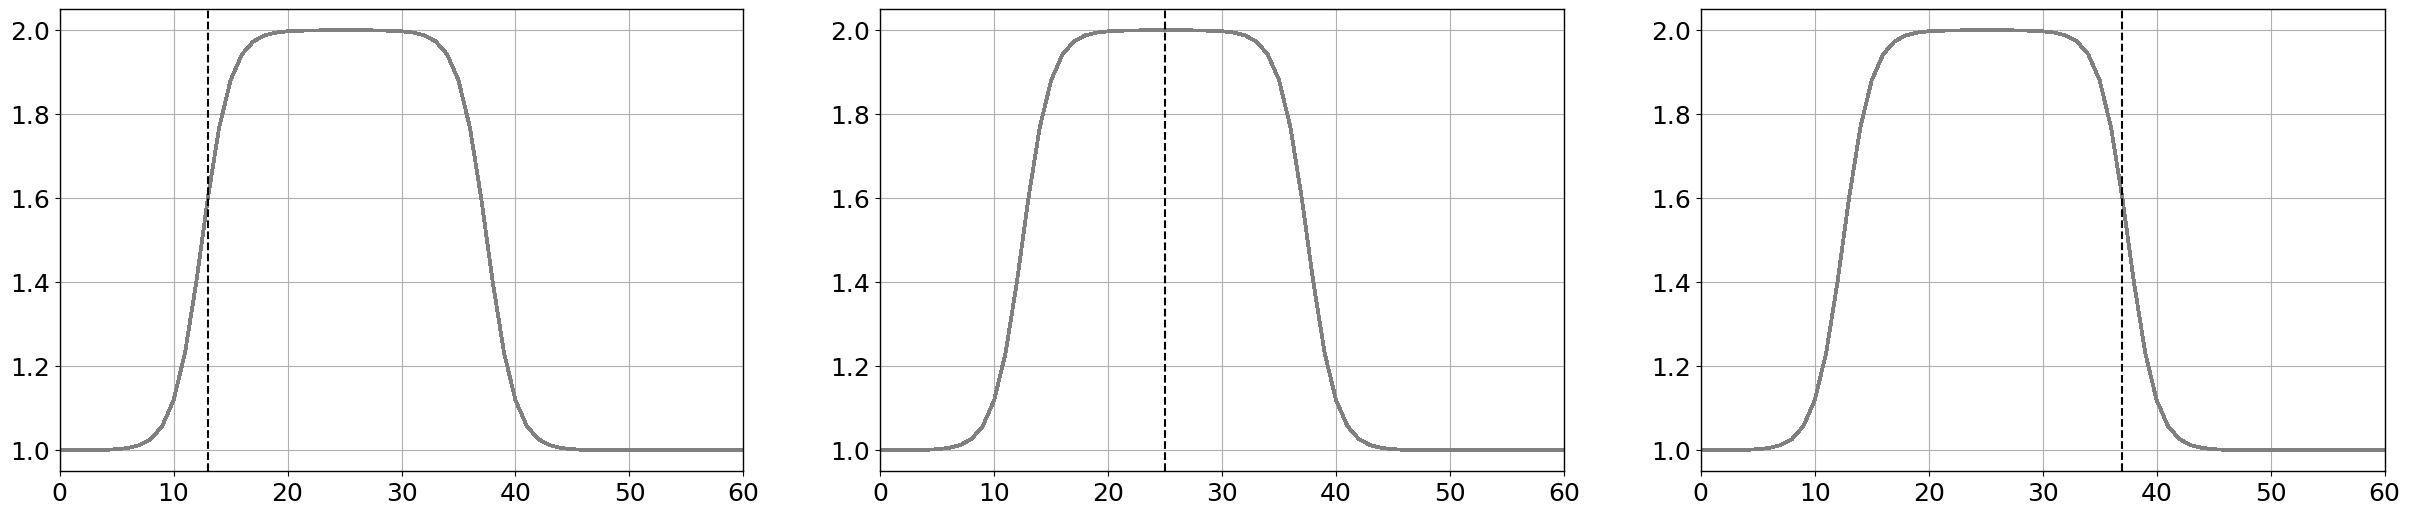

In [ ]:
index = 12

params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle',
          'front_poldist_5eV', 'Te', 'Td+', 'Td', 'Ne', 'Nd']


# Get 2D and 1D data for the specific time index
indexes = [13,25, 37]

fig, ax = plt.subplots(1, 3, figsize=(30, 5))

ax = ax.flatten()

for i,index in enumerate(indexes):

    profile_fcx_on = get_1d_poloidal_data(case_2d_fcx_on.isel(t=index), params=params, region='outer_lower', sepadd=6)
    profile_fcx_off = get_1d_poloidal_data(case_2d_fcx_off.isel(t=index), params=params, region='outer_lower', sepadd=6)


    ax[i].plot(profile_fcx_on['Spar'], profile_fcx_on['Te'], label='Te fcx_on', linewidth=2, linestyle='-', color='blue')
    ax[i].plot(profile_fcx_on['Spar'], profile_fcx_on['Td+'], label='Td+ fcx_on', linewidth=2, linestyle='-', color='red')
    ax[i].plot(profile_fcx_on['Spar'], profile_fcx_on['Td'], label='Td fcx_on', linewidth=2, linestyle='-', color='green')


    ax[i].plot(profile_fcx_off['Spar'], profile_fcx_off['Te'], label='Te fcx_off', linewidth=2, linestyle='--', color='blue')
    ax[i].plot(profile_fcx_off['Spar'], profile_fcx_off['Td+'], label='Td+ fcx_off', linewidth=2, linestyle='--', color='red')
    ax[i].plot(profile_fcx_off['Spar'], profile_fcx_off['Td'], label='Td fcx_off', linewidth=2, linestyle='--', color='green')

    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel('Temperature (eV)')
    ax[i].set_ybound(0, 200)
    ax[i].legend(ncols=2)

    max_current = 0
    if max_current < np.max(profile_fcx_off['Td+']):
        max_current = np.max(profile_fcx_off['Td+'])



fig,ax = plt.subplots(1, 3, figsize=(30, 5))
    
for i, value in enumerate(indexes):

    profile_fcx_on = get_1d_poloidal_data(case_2d_fcx_on.isel(t=value), params=params, region='outer_lower', sepadd=6)
    profile_fcx_off = get_1d_poloidal_data(case_2d_fcx_off.isel(t=value), params=params, region='outer_lower', sepadd=6)

    ax[i].plot(profile_fcx_on['Spar'], profile_fcx_on['Ne'], label='Ne fcx_on', linewidth=2, linestyle='-', color='blue')
    ax[i].plot(profile_fcx_on['Spar'], profile_fcx_on['Nd'], label='Nd fcx_on', linewidth=2, linestyle='-', color='green')
    ax[i].plot(profile_fcx_off['Spar'], profile_fcx_off['Ne'], label='Ne fcx_off', linewidth=2, linestyle='--', color='blue')
    ax[i].plot(profile_fcx_off['Spar'], profile_fcx_off['Nd'], label='Nd fcx_off', linewidth=2, linestyle='--', color='green')


    ax[i].set_xlabel(r'S$_{\parallel}$ (m)')
    ax[i].set_ylabel('Density (m$^{-3}$)')
    ax[i].legend(ncol=2)

    max_current = 0
    if max_current < np.max(profile_fcx_off['Ne']):
        max_current = np.max(profile_fcx_off['Ne'])

    ax[i].set_ybound(0, 1.5e20)

fig, ax = plt.subplots(1, 3, figsize=(30, 6))
ax = ax.flatten()
for i, value in enumerate(indexes):
    time = ((fcx_on_ds['t'] - fcx_on_ds['t'][0]) * 1e3)[value]
    ax[i].plot((fcx_on_ds['t'] - fcx_on_ds['t'][0]) * 1e3, fcx_on_ds['Pe_src'] / fcx_on_ds['Pe_src'][-1], label='Pressure source', linewidth=2, color='grey', alpha=0.5)
    ax[i].axvline(time, color='black', linestyle='--')
    ax[i].set_xbound(0, 60)
    


# case = fcx_off_ds.isel(t=index)

In [ ]:
import numpy as np

def find_edges(fcx_on_ds, threshold=1.5):
    """
    Finds the index of the rising and falling edges where Pe_src[:, 3] passes through the threshold.
    
    Parameters:
    - fcx_on_ds: The dataset containing the time steps and 'Pe_src' values.
    - threshold: The threshold value to check for the rising and falling edges (default is 1.5).
    
    Returns:
    - rising_edge_index: Index of the rising edge.
    - falling_edge_index: Index of the falling edge.
    """
    
    # Get the 'Pe_src' values for all times
    Pe_src_all_times = fcx_on_ds['Pe_src'].values

    # Define the threshold based on the multiple
    threshold_value = threshold * Pe_src_all_times[-1, 3]  # Calculate the threshold based on the last time step

    # Find the indices where the value exceeds the threshold for the first time (rising edge)
    rising_edge_index = np.where(Pe_src_all_times[:, 3] >= threshold_value)[0][0]

    # Find the indices where the value falls below the threshold (falling edge)
    # We reverse the array to find the last crossing and then reverse the result to get the original index
    falling_edge_index = np.where(Pe_src_all_times[:, 3] <= threshold_value)[0][-1]

    return rising_edge_index, falling_edge_index

# Example usage
rising_edge, falling_edge = find_edges(fcx_on_ds)

print(f"Rising edge index: {rising_edge}")
print(f"Falling edge index: {falling_edge}")


Rising edge index: 13
Falling edge index: 600
